# EXPLORATORY DATA ANALYSIS

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the Uber dataset
df=pd.read_csv("UberDataset.csv")
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [8]:
df.shape

(1156, 7)

In [9]:
# Count missing values in each column
print("\nMissing Values in Each Column:")
df.isnull().sum()


Missing Values in Each Column:


START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

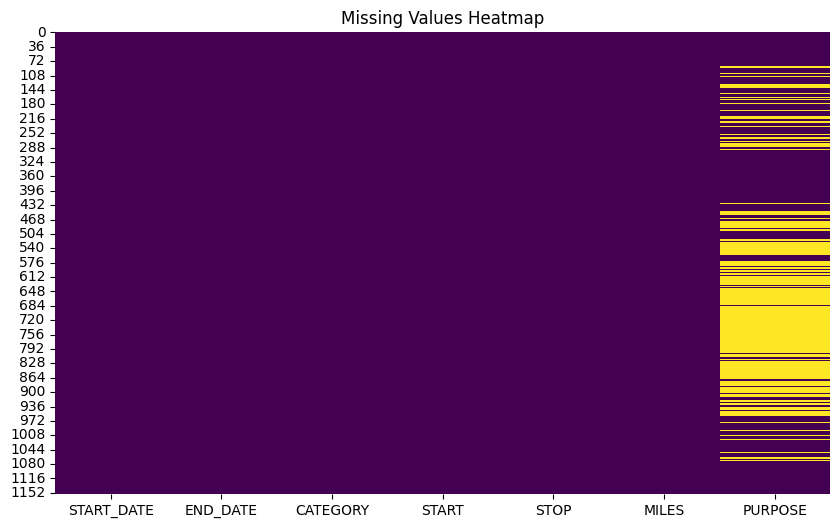

In [13]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [14]:
# Check the skewness of MILES
print("\nSkewness of MILES:")
if 'MILES' in df.columns:
    print(df['MILES'].skew())


Skewness of MILES:
33.817609504415614


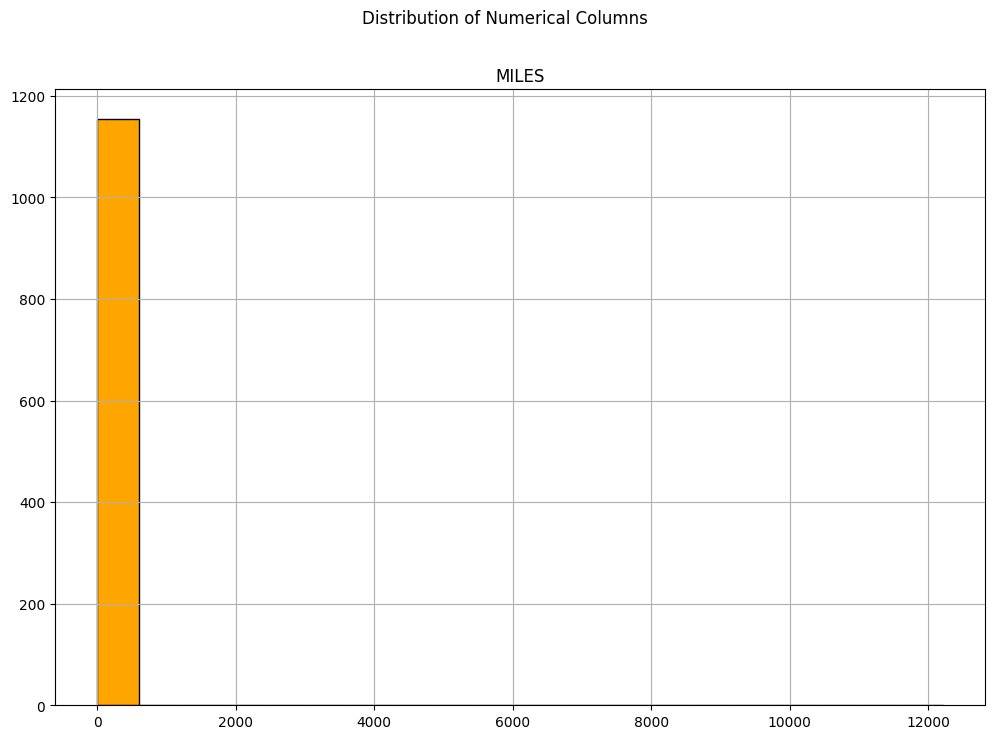

In [48]:
# Plot the distribution of numerical columns with a histogram
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(figsize=(12, 8), bins=20, color='orange', edgecolor='black')
plt.suptitle('Distribution of Numerical Columns')
plt.show()

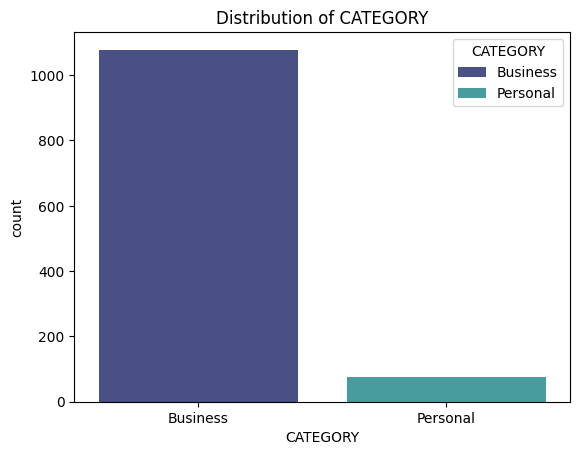

In [73]:
# Display a countplot for CATEGORY to observe the distribution
sns.countplot(x='CATEGORY', data=df, palette='mako', hue='CATEGORY')
plt.title("Distribution of CATEGORY")
plt.show()
# Insight: Most trips fall under the 'Business' category.

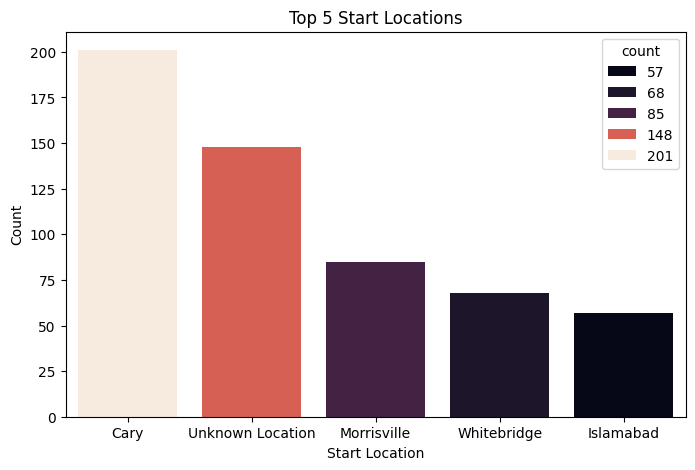

In [64]:
# Use a countplot for the top 5 START locations
if 'START' in df.columns:
    top_5_starts = df['START'].value_counts().head(5)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=top_5_starts.index, y=top_5_starts.values, palette='rocket', hue=top_5_starts)
    plt.title("Top 5 Start Locations")
    plt.xlabel("Start Location")
    plt.ylabel("Count")
    plt.show()

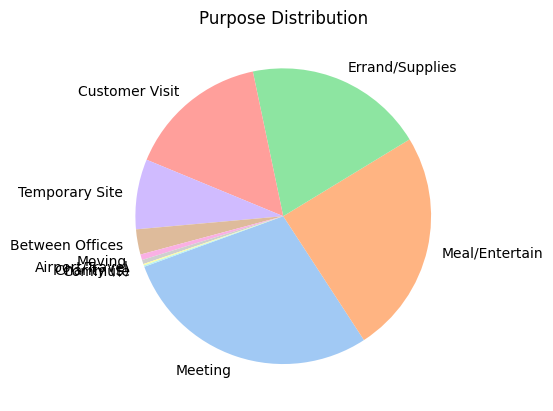

In [70]:
# Display a pie chart for PURPOSE autopct='%1.1f%%', startangle=140,
purpose_counts = df['PURPOSE'].value_counts()
plt.pie(purpose_counts, labels=purpose_counts.index, colors=sns.color_palette("pastel"), startangle=200)
plt.title("Purpose Distribution")
plt.show()
# Insight: 'Meeting' and 'Meal/Entertain' are the most common purposes for trips.